In [1]:
import pandas as pd

def get_data():
    dataframes = []
    
    for p in range(1, 13):
        url = 'http://www.espn.com/nba/statistics/rpm/_/page/{0}'.format(p)
        print(url)
        table = pd.read_html(url, skiprows=0, header=0)[0]
        
        for c in table.columns:
            table[c] = pd.to_numeric(table[c], errors='ignore')    

        table['PLAYER'] = table['NAME'].apply(lambda x: x.split(',')[0])
        table = table.drop(columns=['NAME'])
        
        dataframes.append(table)
    
    return pd.concat(dataframes)


In [2]:
rpm = get_data()

http://www.espn.com/nba/statistics/rpm/_/page/1
http://www.espn.com/nba/statistics/rpm/_/page/2
http://www.espn.com/nba/statistics/rpm/_/page/3
http://www.espn.com/nba/statistics/rpm/_/page/4
http://www.espn.com/nba/statistics/rpm/_/page/5
http://www.espn.com/nba/statistics/rpm/_/page/6
http://www.espn.com/nba/statistics/rpm/_/page/7
http://www.espn.com/nba/statistics/rpm/_/page/8
http://www.espn.com/nba/statistics/rpm/_/page/9
http://www.espn.com/nba/statistics/rpm/_/page/10
http://www.espn.com/nba/statistics/rpm/_/page/11
http://www.espn.com/nba/statistics/rpm/_/page/12


In [3]:
rpm.head()

,RK,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS,PLAYER
0,1,OKC,56,36.3,4.98,3.46,8.44,14.90,Paul George
1,2,HOU,54,37.4,7.65,0.23,7.88,13.50,James Harden
2,3,DEN,56,31.6,4.60,1.86,6.46,10.56,Nikola Jokic
3,4,NO,45,36.0,3.36,3.07,6.43,9.98,Anthony Davis
4,5,MIL,53,33.2,3.22,2.92,6.14,10.47,Giannis Antetokounmpo


In [4]:
def get_per(year=2019):
    
    tables = []
    for p in range(1, 8):
        if year != 2019:
            url = 'http://insider.espn.com/nba/hollinger/statistics/_/page/{0}/year/{1}'.format(p, year)
        else:
            url = 'http://insider.espn.com/nba/hollinger/statistics/_/page/{0}'.format(p)
        print(url)
        table = pd.read_html(url, skiprows=0, header=1)[0]
        table = table[table['PLAYER'] != 'PLAYER']
        for c in table.columns:
            table[c] = pd.to_numeric(table[c], errors='ignore')    

        table['PLAYER'] = table['PLAYER'].apply(lambda x: x.split(',')[0])
        tables.append(table)
    
    return pd.concat(tables)
        
per = get_per()

http://insider.espn.com/nba/hollinger/statistics/_/page/1
http://insider.espn.com/nba/hollinger/statistics/_/page/2
http://insider.espn.com/nba/hollinger/statistics/_/page/3
http://insider.espn.com/nba/hollinger/statistics/_/page/4
http://insider.espn.com/nba/hollinger/statistics/_/page/5
http://insider.espn.com/nba/hollinger/statistics/_/page/6
http://insider.espn.com/nba/hollinger/statistics/_/page/7


In [113]:
def get_per_with_pos(year=2019):
    
    tables = []
    for pos in ['pg', 'sg', 'sf', 'pf', 'c']:
        for p in range(1, 5):
            url = 'http://insider.espn.com/nba/hollinger/statistics/_/position/{1}/page/{0}'.format(p, pos)
            
            if year != 2019:
                url = '{0}/year/{1}'.format(url, year)
                
            try:
                table = pd.read_html(url, skiprows=0, header=1)[0]
                table = table[table['PLAYER'] != 'PLAYER']
            except Exception:
                break
            
            print("found:", url)
            for c in table.columns:
                table[c] = pd.to_numeric(table[c], errors='ignore')    
            
            table['POS'] = pos.upper()
            # remove team names from player names
            table['PLAYER'] = table['PLAYER'].apply(lambda x: x.split(',')[0])
            tables.append(table)
    
    return pd.concat(tables)

In [114]:
per_2019 = get_per_with_pos(2019)

found: http://insider.espn.com/nba/hollinger/statistics/_/position/pg/page/1
found: http://insider.espn.com/nba/hollinger/statistics/_/position/pg/page/2
found: http://insider.espn.com/nba/hollinger/statistics/_/position/sg/page/1
found: http://insider.espn.com/nba/hollinger/statistics/_/position/sg/page/2
found: http://insider.espn.com/nba/hollinger/statistics/_/position/sf/page/1
found: http://insider.espn.com/nba/hollinger/statistics/_/position/sf/page/2
found: http://insider.espn.com/nba/hollinger/statistics/_/position/pf/page/1
found: http://insider.espn.com/nba/hollinger/statistics/_/position/pf/page/2
found: http://insider.espn.com/nba/hollinger/statistics/_/position/c/page/1
found: http://insider.espn.com/nba/hollinger/statistics/_/position/c/page/2


In [115]:
# get qualified players only

url = 'https://www.teamrankings.com/nba/stat/games-played'
games_data = pd.read_html(url)[0]

min_min_played = (games_data['2018'].mean() * 48) / 3

qualified_2019 = per_2019[(per_2019['GP'] * per_2019.MPG) > min_min_played]

In [220]:
def by_pos(data, pos, stat, ascending=False):
    return data[data.POS == pos].sort_values(by=stat, ascending=ascending).head()

by_pos(qualified_2019, 'SG', 'TS%', ascending=True)

,RK,PLAYER,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER,VA,EWA,POS
27,76.0,Bruce Brown,49,19.8,0.455,18.3,10.0,12.9,3.6,11.6,7.5,6.47,-58.4,-1.9,SG
23,72.0,Josh Okogie,49,22.7,0.471,11.4,9.8,16.5,2.8,11.6,7.1,8.19,-38.3,-1.3,SG
26,75.0,Avery Bradley,52,29.9,0.481,16.7,10.4,14.2,2.5,6.9,4.8,6.53,-92.0,-3.1,SG
36,34.0,Tyreke Evans,51,20.4,0.490,16.5,11.8,26.3,2.9,11.9,7.5,12.17,25.9,0.9,SG
12,62.0,Iman Shumpert,45,26.0,0.504,18.5,7.7,12.2,1.8,10.4,6.0,9.77,-12.7,-0.4,SG


In [376]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

def box_and_strip(stat, data):
    
    dims = (16, 9)
    fig, ax = plt.subplots(figsize=dims)
    
    
    x = "POS"
    y = stat
    p = "Set3"
    order = ['PG', 'SG', 'SF', 'PF', 'C']
    
    box_ax = sns.boxplot(ax=ax, x=x, y=y, order=order, data=data, 
                         palette=p, width=.4, fliersize=0)

    strip_ax = sns.stripplot(ax=ax, x=x, y=y, order=order, data=data,
                             palette=p, linewidth=.75, jitter=True)
    
    ax.set_ylabel('')    
    ax.set_xlabel('')
    
    if stat != 'TS%':
        box_ax.set_ylim(0, )
        strip_ax.set_ylim(0, )
    
    return box_ax, strip_ax


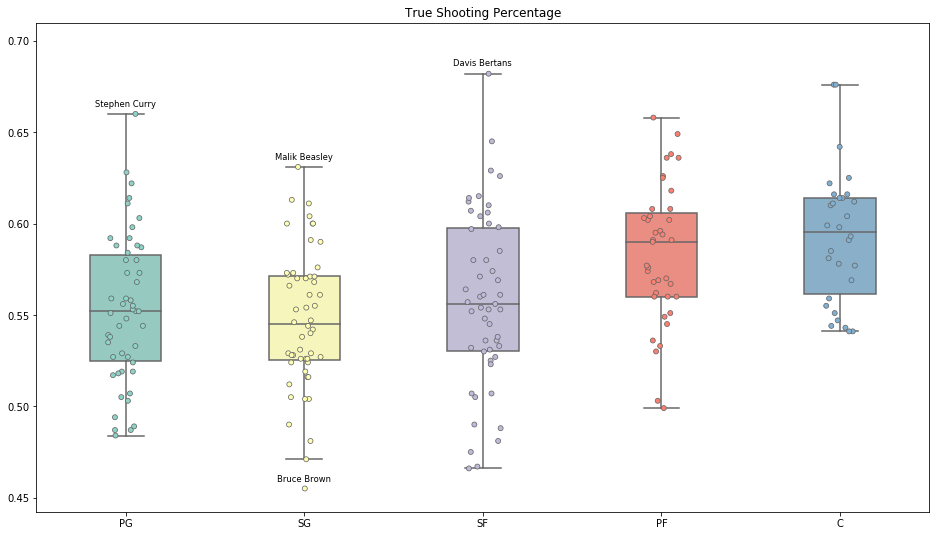

In [398]:
def draw_ts():
    box, strip = box_and_strip('TS%', qualified_2019)
    box.set_title("True Shooting Percentage")
    box.set_ylim(top=.71)
    
    options = dict(size='small', color='black', fontweight=550, ha='center')
    
    db = box.text(2, 0.6865, "Davis Bertans", **options)
    jh = box.text(0, 0.664, "Stephen Curry", **options)
    bb = box.text(1, 0.459, "Bruce Brown", **options)
    mb = box.text(1, 0.635, "Malik Beasley", **options)
    
    box.get_figure().savefig('TS%.png', dpi=300)
    
draw_ts()

In [335]:
by_pos(qualified_2019, 'C', 'AST', ascending=False)

,RK,PLAYER,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER,VA,EWA,POS
0,1.0,Nikola Jokic,56,31.6,0.591,27.4,11.3,29.9,9.7,27.2,18.4,27.05,433.9,14.5,C
22,21.0,Al Horford,48,28.5,0.598,24.6,9.8,19.1,7.1,18.4,12.7,19.74,186.9,6.2,C
35,33.0,Kevon Looney,57,20.8,0.625,23.1,8.6,12.5,14.0,16.2,15.2,16.97,112.6,3.8,C
33,31.0,Marc Gasol,56,33.0,0.541,21.5,10.6,22.0,3.6,26.1,14.6,17.33,185.6,6.2,C
37,35.0,Bam Adebayo,56,22.1,0.611,20.0,14.6,15.7,9.9,22.3,16.1,16.58,110.3,3.7,C


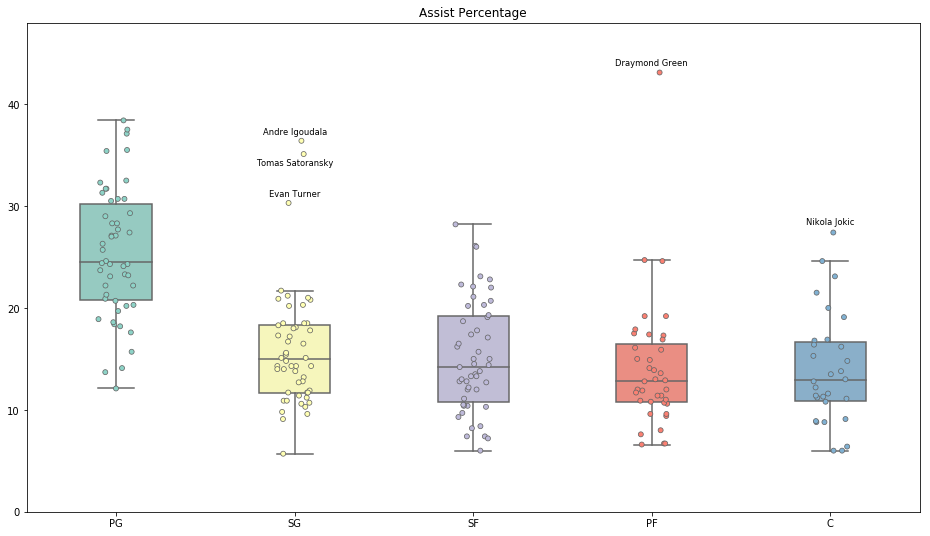

In [394]:
def draw_ast():
    box, strip = box_and_strip('AST', qualified_2019)
    box.set_ylim(0, 48)

    box.set_title("Assist Percentage")

    annotate = [
        (1, 37, 'Andre Igoudala'),
        (1, 34, 'Tomas Satoransky'),
        (1, 30.9, 'Evan Turner'),
        (3, 43.8, 'Draymond Green'),
        (4, 28.25, 'Nikola Jokic')
    ]
    
    options = dict(size='small', color='black', fontweight=550, ha='center')
    
    for a in annotate:
        box.text(*a, **options)

    box.get_figure().savefig('ast%.png', dpi=300)
    
draw_ast()

In [350]:
by_pos(qualified_2019, 'PG', 'TO', ascending=True)

,RK,PLAYER,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER,VA,EWA,POS
22,21.0,Monte Morris,57,25.0,0.580,28.3,4.4,18.4,1.9,9.7,5.8,16.89,125.1,4.2,PG
11,61.0,Landry Shamet,57,20.9,0.614,13.7,5.9,15.8,1.5,5.9,3.8,11.33,5.8,0.2,PG
42,40.0,Terry Rozier,57,23.3,0.503,24.4,6.8,19.0,2.1,17.1,9.6,13.60,51.4,1.7,PG
6,7.0,Mike Conley,56,33.5,0.552,24.3,7.1,27.6,2.0,9.8,5.8,20.44,264.3,8.8,PG
9,10.0,Derrick Rose,41,28.5,0.559,20.9,7.3,27.4,2.4,8.1,5.2,19.56,149.3,5.0,PG


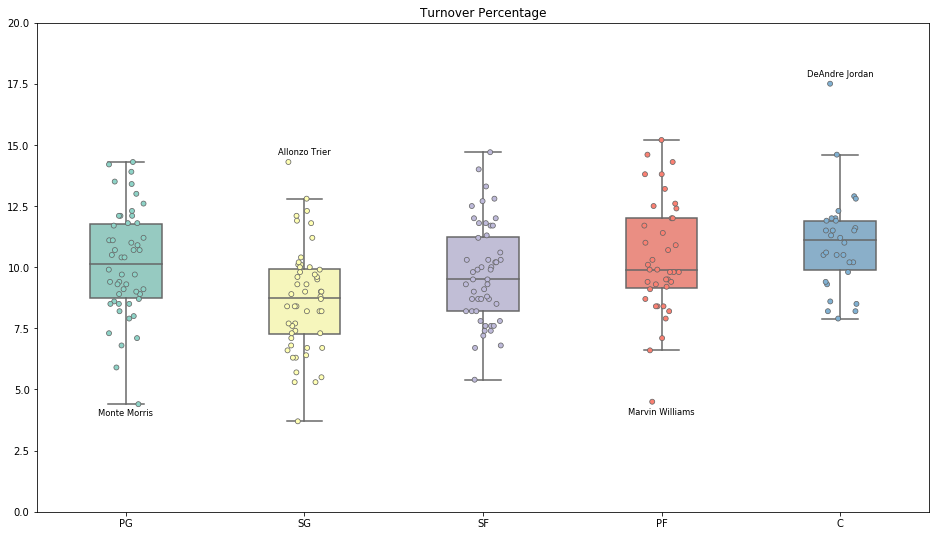

In [382]:
def draw_to():
    stat = 'TO'
    box, strip = box_and_strip(stat, qualified_2019)
    box.set_ylim(0, 20)
    box.set_title("Turnover Percentage")
    
    annotate = [
        (4, 17.8, 'DeAndre Jordan'),
        (3, 4, 'Marvin Williams'),
        (1, 14.6, 'Allonzo Trier'),
        (0, 3.95, 'Monte Morris'),
    ]
    
    options = dict(size='small', color='black', fontweight=550, ha='center')
    
    for a in annotate:
        box.text(*a, **options)

    box.get_figure().savefig('{0}.png'.format(stat), dpi=300)
    
draw_to()

In [367]:
by_pos(qualified_2019, 'SG', 'USG', ascending=False)

,RK,PLAYER,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER,VA,EWA,POS
0,1.0,Lou Williams,53,26.1,0.561,20.9,9.5,33.2,1.7,9.8,5.9,21.91,235.4,7.8,SG
3,4.0,Devin Booker,44,34.8,0.571,20.8,12.1,31.7,1.9,11.1,6.4,18.82,189.9,6.3,SG
12,12.0,Donovan Mitchell,53,33.3,0.516,14.0,9.6,31.0,2.3,10.5,6.4,15.97,144.0,4.8,SG
4,5.0,DeMar DeRozan,54,35.3,0.524,21.0,9.0,28.9,2.4,16.6,9.6,18.62,230.9,7.7,SG
5,6.0,Victor Oladipo,36,31.9,0.519,20.3,8.9,28.2,2.1,17.2,9.8,17.84,125.7,4.2,SG


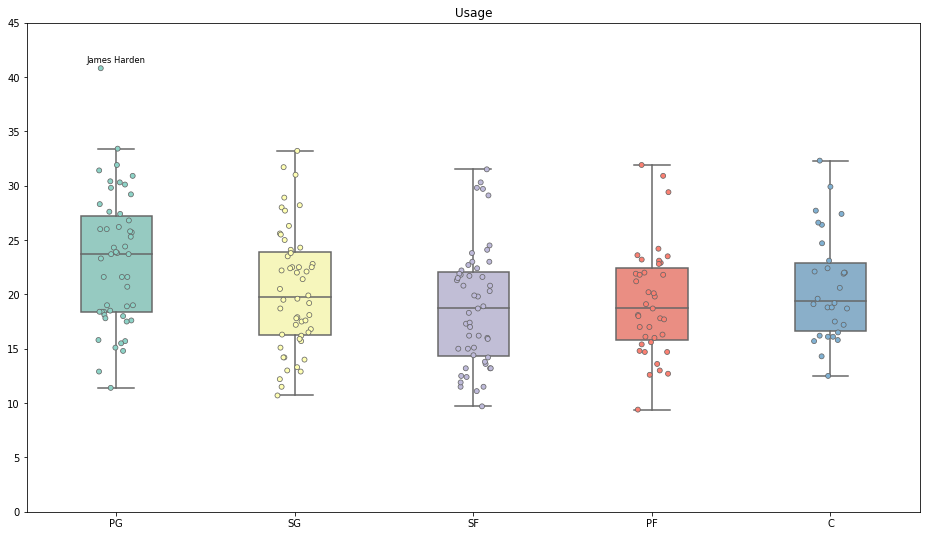

In [401]:
def draw_usg():
    stat = 'USG'
    box, strip = box_and_strip(stat, qualified_2019)
    box.set_title("Usage")
    box.set_ylim(0, 45)

    
    annotate = [
        (0, 41.3, 'James Harden'),
#         (3, 4, 'Marvin Williams'),
#         (1, 14.6, 'Allonzo Trier'),
#         (0, 3.95, 'Monte Morris'),
    ]
    
    options = dict(size='small', color='black', fontweight=550, ha='center')
    
    for a in annotate:
        box.text(*a, **options)

    box.get_figure().savefig('{0}.png'.format(stat), dpi=300)
    
draw_usg()

In [421]:
by_pos(qualified_2019, 'PG', 'ORR', ascending=False)[['PLAYER', 'ORR']]

,PLAYER,ORR
7,Ben Simmons,7.2
36,Delon Wright,4.4
5,Russell Westbrook,4.2
5,Lonzo Ball,4.0
2,Kyrie Irving,3.8


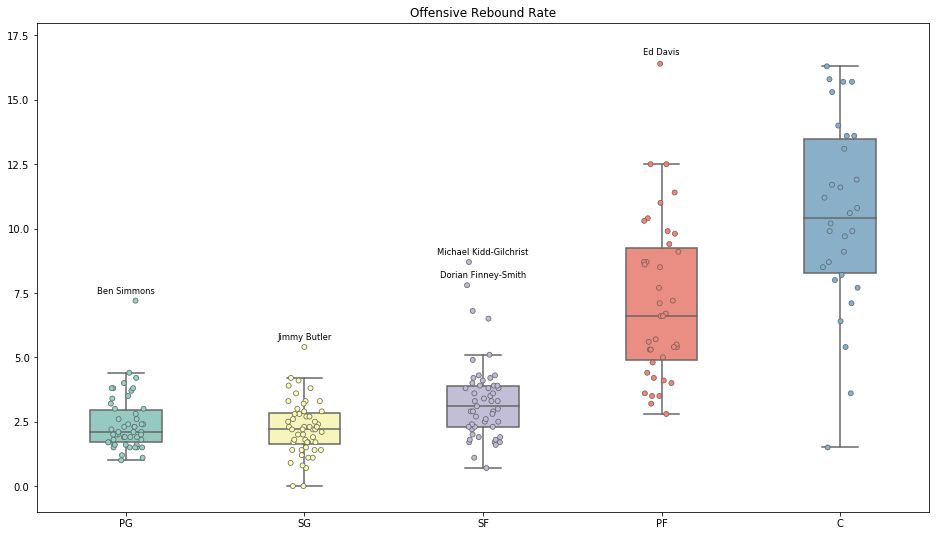

In [423]:
def draw_orr():
    stat = 'ORR'
    box, strip = box_and_strip(stat, qualified_2019)
    box.set_title("Offensive Rebound Rate")
    box.set_ylim(-1, 18)

    
    annotate = [
        (3, 16.75, 'Ed Davis'),
        (2, 9, 'Michael Kidd-Gilchrist'),
        (2, 8.1, 'Dorian Finney-Smith'),
        (1, 5.7, 'Jimmy Butler'),
        (0, 7.5, 'Ben Simmons')
    ]
    
    options = dict(size='small', color='black', fontweight=550, ha='center')
    
    for a in annotate:
        box.text(*a, **options)

    box.get_figure().savefig('{0}.png'.format(stat), dpi=300)
    
draw_orr()

In [433]:
by_pos(qualified_2019, 'PG', 'DRR', ascending=False)[['PLAYER', 'DRR']]

,PLAYER,DRR
5,Russell Westbrook,28.7
7,Ben Simmons,21.0
0,James Harden,17.7
42,Terry Rozier,17.1
13,Patrick Beverley,14.7


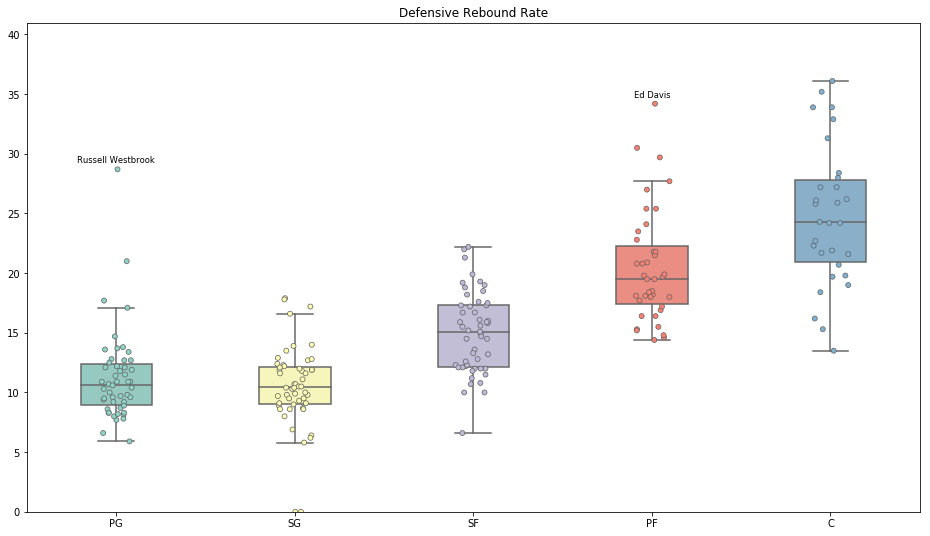

In [443]:
def draw_drr():
    stat = 'DRR'
    box, strip = box_and_strip(stat, qualified_2019)
    box.set_title("Defensive Rebound Rate")
    box.set_ylim(0, 41)
    
    annotate = [
        (3, 34.7, 'Ed Davis'),
        (0, 29.3, 'Russell Westbrook')
    ]
    
    options = dict(size='small', color='black', fontweight=550, ha='center')
    
    for a in annotate:
        box.text(*a, **options)

    box.get_figure().savefig('{0}.png'.format(stat), dpi=300)
    
draw_drr()

In [484]:
by_pos(qualified_2019, 'C', 'PER', ascending=False)[['PLAYER', 'PER']]

,PLAYER,PER
0,Nikola Jokic,27.05
1,Karl-Anthony Towns,25.67
2,Nikola Vucevic,25.67
3,Joel Embiid,25.53
6,Rudy Gobert,24.49


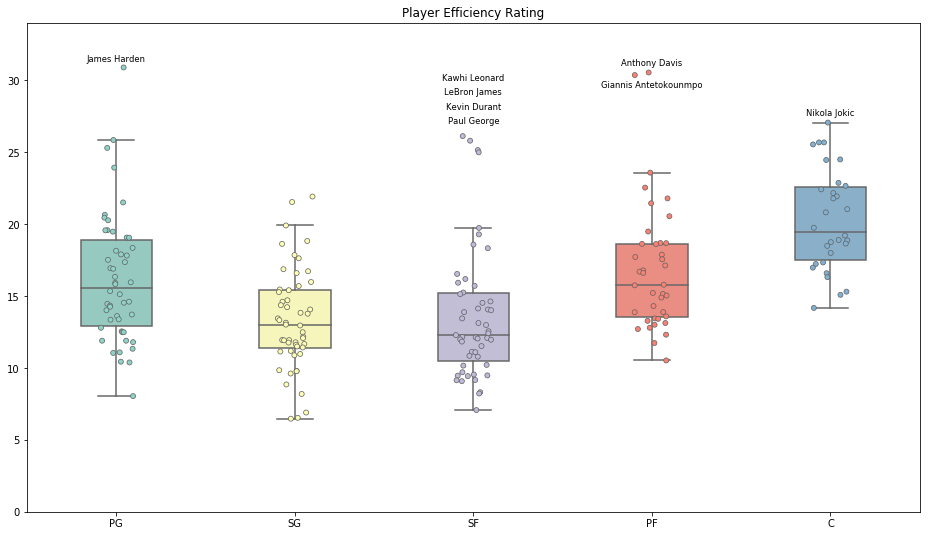

In [487]:
def draw_per():
    stat = 'PER'
    box, strip = box_and_strip(stat, qualified_2019)
    box.set_title("Player Efficiency Rating")
    box.set_ylim(0, 34)
    
    annotate = [
        (2, 30, 'Kawhi Leonard'),
        (2, 29, 'LeBron James'),
        (2, 28, 'Kevin Durant'),
        (2, 27, 'Paul George'),
        (3, 31, 'Anthony Davis'),
        (3, 29.5, 'Giannis Antetokounmpo'),
        (0, 31.28, 'James Harden'),
        (4, 27.55, 'Nikola Jokic')
    ]
    
    options = dict(size='small', color='black', fontweight=550, ha='center')
    
    for a in annotate:
        box.text(*a, **options)

    box.get_figure().savefig('{0}.png'.format(stat), dpi=300)
    
draw_per()

In [239]:
merged = pd.merge(per, rpm, how='left', on='PLAYER')
merged = merged.set_index(drop=True, keys=['PLAYER'])

In [9]:
merged.head()

,RK_x,GP_x,MPG_x,TS%,AST,TO,USG,ORR,DRR,REBR,...,EWA,POS,RK_y,TEAM,GP_y,MPG_y,ORPM,DRPM,RPM,WINS
PLAYER,,,,,,,,,,,,,,,,,,,,,
Chris Paul,1.0,45,38.0,0.584,36.6,8.5,23.3,1.3,11.9,6.5,...,10.9,PG,24.0,HOU,34.0,32.5,2.46,0.93,3.39,4.44
Steve Nash,2.0,81,32.8,0.615,39.3,13.0,24.5,1.5,9.4,5.7,...,14.1,PG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Deron Williams,3.0,76,36.9,0.574,34.9,11.0,24.8,2.2,10.4,6.4,...,13.4,PG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chauncey Billups,4.0,73,34.1,0.601,23.1,10.0,23.6,1.2,9.3,5.3,...,11.5,PG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rajon Rondo,5.0,81,36.6,0.540,38.4,11.9,21.1,4.3,10.5,7.5,...,12.1,PG,334.0,LAL,23.0,28.0,-1.24,-0.65,-1.89,0.53


In [10]:
merged = merged.sort_values(by='RPM', ascending=False)

In [11]:
merged.columns

Index(['RK_x', 'GP_x', 'MPG_x', 'TS%', 'AST', 'TO', 'USG', 'ORR', 'DRR',
       'REBR', 'PER', 'VA', 'EWA', 'POS', 'RK_y', 'TEAM', 'GP_y', 'MPG_y',
       'ORPM', 'DRPM', 'RPM', 'WINS'],
      dtype='object')

In [12]:
merged = merged[['MPG_x', 'TS%', 'AST', 'TO', 'USG', 'ORR', 'DRR',
       'REBR', 'PER', 'VA', 'EWA', 'TEAM', 'ORPM',
       'DRPM', 'RPM', 'WINS']]

In [13]:
merged = merged.rename(columns={'MPG_x': 'MPG'})

In [14]:
cols = list(merged.columns)

In [15]:
cols.insert(1, cols.pop(cols.index('TEAM')))

In [16]:
merged = merged.reindex(columns= cols)

In [500]:
from matplotlib.lines import Line2D
import numpy as np

df = pd.DataFrame({'a': [ np.dtype('int64'), np.dtype('float') ]})

In [501]:
df

,a
0,int64
1,float64
